In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import numpy as np

### Raw Data Visualization

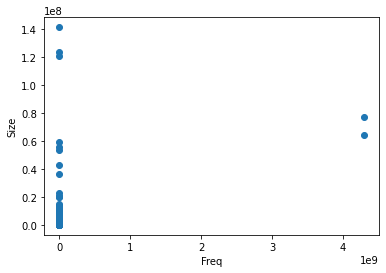

In [2]:
df_pre = pd.read_csv('./parsed/metaFromFcos.csv')
plt.ylabel("Size")
plt.xlabel("Freq")
plt.scatter(df_pre['Frequency'], df_pre['Size'])

Since there exists freq with MAX_INT, we will group them in one and treat them as separate and hence not include them as a part of this analysis

In [3]:
rust_u32_int_max = 4294967295
max_freq_row_no = []
for i, val in enumerate(df_pre['Frequency']):
    if val == rust_u32_int_max:
        max_freq_row_no.append(i)
df = df_pre.drop(max_freq_row_no).sort_values(by=['Frequency']).reset_index(drop=True)

### Clipped Data Visualization

s_low:  0.0 , s_hi:  55698394.08000008
f_low:  0.0 , f_hi:  35.0
Ignored: 5
Anomalitites Ignored 1.2594458438287104 %


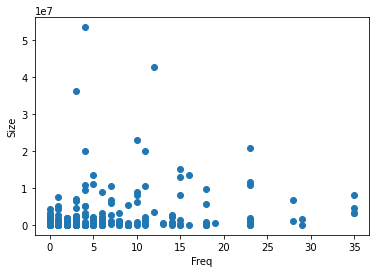

In [4]:
plt.ylabel("Size")
plt.xlabel("Freq")
s_low = df["Size"].quantile(0)
s_hi  = df["Size"].quantile(0.99)
f_low = df["Frequency"].quantile(0)
f_hi  = df["Frequency"].quantile(0.99)
print("s_low: ", s_low, ", s_hi: ", s_hi)
print("f_low: ", f_low, ", f_hi: ", f_hi)
proc = df[(df["Frequency"] <= f_hi) & (df["Frequency"] >= f_low) & (df["Size"] <= s_hi) & (df["Size"] >= s_low)]
plt.scatter(proc["Frequency"], proc["Size"])
print("Ignored:", len(df['Size']) - len(proc['Size']))
print("Anomalitites Ignored", (1-((len(proc['Size']))/len(df['Size'])))*100, "%")

### Finding Anomalies using Stat

In [5]:
def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))

def outliers(col, data, threshold):
    mean = df[col].mean()
    std = df[col].std()
    threshold = threshold
    high_outlier = []
    low_outlier = []
    for i, val in enumerate(data[col]):
        if val > mean + threshold*std:
            high_outlier.append(data["Name"][i])
        if val == 0:
            low_outlier.append(data["Name"][i])
    return [high_outlier, low_outlier]

def mid(col, data, threshold):
    mean = df[col].mean()
    std = df[col].std()
    threshold = threshold
    mid = []
    for i, val in enumerate(data[col]):
        if val < mean + threshold*std and val > 0:
            mid.append(data["Name"][i])
    return mid

def map_pkg(df, pkgs):
    f_map = []
    s_map = []
    n_map = pkgs
    for i, val in enumerate(df["Name"]):
        if val in pkgs:
            f_map.append(df["Frequency"][i])
            s_map.append(df["Size"][i])
    return [f_map, s_map, n_map]

def maxmin(arr):
    if len(arr) != 0:
        return max(arr) - min(arr)
    else:
        return "Nan"
      
    

In [6]:
h_out_freq = outliers("Frequency", df, 1.5)[0]
h_out_size = outliers("Size", df, 1.5)[0]
l_out_freq = outliers("Frequency", df, 1.5)[1]
l_out_size = outliers("Size", df, 1.5)[1]
mid_freq = mid("Frequency", df, 1.5)
mid_size = mid("Size", df, 1.5)

lf_hs = intersection(h_out_size, l_out_freq)
mf_hs = intersection(h_out_size, mid_freq)
hf_hs = intersection(h_out_freq, h_out_size)
lf_ms = intersection(mid_size, l_out_freq)
mf_ms = intersection(mid_size, mid_freq)
hf_ms = intersection(h_out_freq, mid_size)
lf_ls = intersection(l_out_freq, l_out_size)
mf_ls = intersection(mid_freq, l_out_size)
hf_ls = intersection(h_out_freq, l_out_size)

print("lf_hs:", len(lf_hs), "which is", round(len(lf_hs)/len(df['Size'])*100, 1), "% of total pkgs")
print("mf_hs:", len(mf_hs), "which is", round(len(mf_hs)/len(df['Size'])*100, 1), "% of total pkgs")
print("hf_hs:", len(hf_hs), "which is", round(len(hf_hs)/len(df['Size'])*100, 1), "% of total pkgs")
print("lf_ms:", len(lf_ms), "which is", round(len(lf_ms)/len(df['Size'])*100, 1), "% of total pkgs")
print("mf_ms:", len(mf_ms), "which is", round(len(mf_ms)/len(df['Size'])*100, 1), "% of total pkgs")
print("hf_ms:", len(hf_ms), "which is", round(len(hf_ms)/len(df['Size'])*100, 1), "% of total pkgs")
print("lf_ls:", len(lf_ls), "which is", round(len(lf_ls)/len(df['Size'])*100, 1), "% of total pkgs")
print("mf_ls:", len(mf_ls), "which is", round(len(mf_ls)/len(df['Size'])*100, 1), "% of total pkgs")
print("hf_ls:", len(hf_ls), "which is", round(len(hf_ls)/len(df['Size'])*100, 1), "% of total pkgs")

lf_hs: 0 which is 0.0 % of total pkgs
mf_hs: 7 which is 1.8 % of total pkgs
hf_hs: 2 which is 0.5 % of total pkgs
lf_ms: 103 which is 25.9 % of total pkgs
mf_ms: 265 which is 66.8 % of total pkgs
hf_ms: 19 which is 4.8 % of total pkgs
lf_ls: 0 which is 0.0 % of total pkgs
mf_ls: 1 which is 0.3 % of total pkgs
hf_ls: 0 which is 0.0 % of total pkgs


Total Size of lf_hs 0 Frequency difference: Nan
Total Size of mf_hs 541543272 Frequency difference: 12
Total Size of hf_hs 114862154 Frequency difference: 0
Total Size of lf_ms 41087584 Frequency difference: 0
Total Size of mf_ms 398574387 Frequency difference: 18
Total Size of hf_ms 76822341 Frequency difference: 12
Total Size of lf_ls 0 Frequency difference: Nan
Total Size of mf_ls 0 Frequency difference: 0
Total Size of hf_ls 0 Frequency difference: Nan


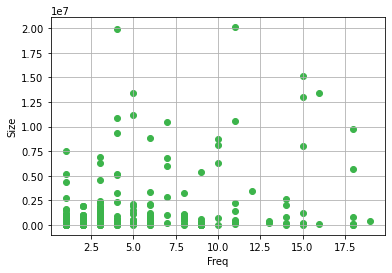

In [7]:
plt.ylabel("Size")
plt.xlabel("Freq")
#           Teal      Red        Orange     Yellow     Green      Pink      Brown      Black       Navy       
colors = ['#469990', '#e6194B', '#f58231', '#ffe119', '#3cb44b', '#f032e6', '#9A6324', '#000000', '#000075']
#plt.scatter(map_pkg(df, lf_hs)[0], map_pkg(df, lf_hs)[1], color=colors[0]) #Teal
print("Total Size of lf_hs", sum(map_pkg(df, lf_hs)[1]), "Frequency difference:", maxmin(map_pkg(df, lf_hs)[0]))

#plt.scatter(map_pkg(df, mf_hs)[0], map_pkg(df, mf_hs)[1], color=colors[1]) #Red
print("Total Size of mf_hs", sum(map_pkg(df, mf_hs)[1]), "Frequency difference:", maxmin(map_pkg(df, mf_hs)[0]))

#plt.scatter(map_pkg(df, hf_hs)[0], map_pkg(df, hf_hs)[1], color=colors[2]) #Orange
print("Total Size of hf_hs", sum(map_pkg(df, hf_hs)[1]), "Frequency difference:", maxmin(map_pkg(df, hf_hs)[0]))

#plt.scatter(map_pkg(df, lf_ms)[0], map_pkg(df, lf_ms)[1], color=colors[3]) #Yellow
print("Total Size of lf_ms", sum(map_pkg(df, lf_ms)[1]), "Frequency difference:", maxmin(map_pkg(df, lf_ms)[0]))

plt.scatter(map_pkg(df, mf_ms)[0], map_pkg(df, mf_ms)[1], color=colors[4]) #Green
print("Total Size of mf_ms", sum(map_pkg(df, mf_ms)[1]), "Frequency difference:", maxmin(map_pkg(df, mf_ms)[0]))

#plt.scatter(map_pkg(df, hf_ms)[0], map_pkg(df, hf_ms)[1], color=colors[5]) #Pink
print("Total Size of hf_ms", sum(map_pkg(df, hf_ms)[1]), "Frequency difference:", maxmin(map_pkg(df, hf_ms)[0]))

#plt.scatter(map_pkg(df, lf_ls)[0], map_pkg(df, lf_ls)[1], color=colors[6]) #Brown
print("Total Size of lf_ls", sum(map_pkg(df, lf_ls)[1]), "Frequency difference:", maxmin(map_pkg(df, lf_ls)[0]))

#plt.scatter(map_pkg(df, mf_ls)[0], map_pkg(df, mf_ls)[1], color=colors[7]) #Black 
print("Total Size of mf_ls", sum(map_pkg(df, mf_ls)[1]), "Frequency difference:", maxmin(map_pkg(df, mf_ls)[0]))

#plt.scatter(map_pkg(df, hf_ls)[0], map_pkg(df, hf_ls)[1], color=colors[8]) #Navy
print("Total Size of hf_ls", sum(map_pkg(df, hf_ls)[1]), "Frequency difference:", maxmin(map_pkg(df, hf_ls)[0]))

plt.grid()

In [73]:
median_f_m = pd.DataFrame(map_pkg(df, mf_ms)[0])[0].quantile(interpolation='lower')
median_s_m = pd.DataFrame(map_pkg(df, mf_ms)[1])[0].quantile(interpolation='lower')
#print("f:", median_f_m, "s:", median_s_m)

def create_bins(arr, bins):
    freq_arr, size_arr, name_arr = arr
    max_size = max(size_arr)
    bin_size = 0
    bin_content = []
    start = 0
    for i, _freq_pkg in enumerate(freq_arr):
        size_pkg = size_arr[i]
        bin_content.append(name_arr[i])
        bin_size += size_pkg
        
        if bin_size > max_size:
            bin_content.pop()
            bins.append({
                "content" : bin_content.copy(),
                "size" : bin_size - size_pkg,
                "freq_diff" : maxmin(freq_arr[start: i+1]),
            })
            bin_content.clear()
            bin_content.append(name_arr[i])
            bin_size = size_pkg
            start = i
        
        elif bin_size == max_size:
            bins.append({
                "content" : bin_content.copy(),
                "size" : bin_size,
                "freq_diff" : maxmin(freq_arr[start: i+1]),
            })
            bin_size = 0
            bin_content.clear()
            start = i + 1
            
        elif i == len(freq_arr) - 1 and bin_size < max_size:
            bins.append({
            "content" : bin_content.copy(),
            "size" : bin_size,
            "freq_diff" : maxmin(freq_arr[start: i+1]),
            })
        
    return bins

bins = []
create_bins(map_pkg(df, mf_hs), bins)
create_bins(map_pkg(df, hf_hs), bins)
create_bins(map_pkg(df, lf_ms), bins)
create_bins(map_pkg(df, mf_ms), bins)
create_bins(map_pkg(df, hf_ms), bins)
print(len(bins))
bins

47


[{'content': ['containerd-1.6.10-1.fc37.x86_64',
   'podman-4:4.3.1-1.fc37.x86_64',
   'containernetworking-plugins-1.1.1-8.fc37.x86_64'],
  'size': 112739799,
  'freq_diff': 8},
 {'content': ['skopeo-1:1.10.0-3.fc37.x86_64'],
  'size': 120931866,
  'freq_diff': 1},
 {'content': ['libicu-71.1-2.fc37.x86_64'], 'size': 42714263, 'freq_diff': 1},
 {'content': ['moby-engine-20.10.20-1.fc37.x86_64'],
  'size': 141254300,
  'freq_diff': 2},
 {'content': ['kernel-modules-6.0.11-300.fc37.x86_64'],
  'size': 55547726,
  'freq_diff': 0},
 {'content': ['grep-3.7-4.fc37.x86_64',
   'diffutils-3.8-3.fc37.x86_64',
   'cpio-2.13-13.fc37.x86_64',
   'keyutils-libs-1.6.1-5.fc37.x86_64',
   'p11-kit-0.24.1-3.fc37.x86_64',
   'libdaemon-0.14-24.fc37.x86_64',
   'fedora-release-common-37-14.noarch',
   'libunistring-1.0-2.fc37.x86_64',
   'wireguard-tools-1.0.20210914-3.fc37.x86_64',
   'jansson-2.13.1-5.fc37.x86_64',
   'libpsl-0.21.1-6.fc37.x86_64',
   'sg3_utils-1.46-4.fc37.x86_64',
   'libcap-2.48-5.f

In [9]:
def basic_packing(components, bins):
    bins = []
    # remove high freq anomaly and pack them as a bin
    # define max bin size to max(components.size)
    # Aim to minimize frequency maxmin(bin)
    # get freq/size (LHM) 9 parts
    # for the part with size>Max_SIZE and freq>max_min, recursively find median (0.5 quntile) of freqequncy
    # and use that as a partition to split the pkgs according to frequqncy. When once found fb<bands<fa, add
    # to bin by first size
    # Prevent doing a package structure change
    return

In [8]:
basic_packing(query, 64)